<a href="https://colab.research.google.com/github/Baxi19/Operativos_2/blob/main/Operativos_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Principios de Sistemas Operativos - Proyecto 2**

*   Kevin Camacho Araya
*   Jazmine Espinoza Palma
*   Randald Villegas Brenes




In [ ]:
!pip install kora -q
from kora.selenium import wd
from bs4 import BeautifulSoup
import bs4
import requests

#Model
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups

# Import necesary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import  make_pipeline

In [ ]:
news = [];

**Web Scrapping de Noticias:**
*   CNET
*   FOX
*   NPR
*   THE NEWS

In [ ]:
def cnet():
  HOME_URL = "https://www.cnet.com/tech-enabled/"
  XPATH_TITLE = '//div[contains(@class, "c-premiumList_link")]'
  XPATH_BODY = '//div[contains(@class, "c-premiumList_desc")]'

  wd.get(HOME_URL)
  all_news = wd.find_elements_by_xpath(XPATH_TITLE)
  all_body = wd.find_elements_by_xpath(XPATH_BODY)

  i = 0
  print("CNET News > Start..")
  for new in all_news:
    news.append({
        "title": new.get_property("innerText"),
        "body": (all_body[i].get_property("innerText"))
        }
        )
    i += 1
    
  print("CNET News > End..")

In [ ]:
def fox():
  HOME_URL = "https://www.foxnews.com/us"
  XPATH_TITLE = '//section[contains(@class, "collection-article-list")]//div[contains(@class, "info")]/header//h4[contains(@class, "title")]'
  XPATH_BODY = '//section[contains(@class, "collection-article-list")]//div[contains(@class, "info")]/div[contains(@class, "content")]'

  wd.get(HOME_URL)
  all_news = wd.find_elements_by_xpath(XPATH_TITLE)
  all_body = wd.find_elements_by_xpath(XPATH_BODY)

  i = 0
  print("FOX News > Start..")
  for new in all_news:
    news.append({
        "title": new.get_property("innerText"),
        "body": (all_body[i].get_property("innerText"))
        }
        )
    i += 1
    
  print("FOX News > End..")

In [ ]:
def npr():
  HOME_URL = "https://www.npr.org/sections/news/"
  XPATH_TITLE = '//div[contains(@class, "list-overflow")]//article[contains(@class, "item")]//h2[contains(@class, "title")]'
  XPATH_BODY = '//div[contains(@class, "list-overflow")]//article[contains(@class, "item")]//p[contains(@class, "teaser")]'

  wd.get(HOME_URL)
  all_news = wd.find_elements_by_xpath(XPATH_TITLE)
  all_body = wd.find_elements_by_xpath(XPATH_BODY)

  i = 0
  print("NPR - National Public Radio > Start..")
  for new in all_news:
    news.append({
        "title": new.get_property("innerText"),
        "body": (all_body[i].get_property("innerText")).split("• ")[1]
        }
        )
    i += 1
    
  print("NPR - National Public Radio > End..")

In [ ]:
def find():
    scraper = Scraper()
    query = Query()
    info=query.get_url()
    #scraper.get(info[0]["link"])
    for x in info:
        Body=scraper.get(x["link"])
        news.append({"title":x["title"],"body":Body})
    #print(len(news))
    print(news)
    return news    
class Response(object):
    def __init__(self, status, content):
        self.status = status
        self.content = content

    def valid(self):
        return (self.status == 200)
class Browser(object):
    def get(self, url):
        headers = {
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
        request = requests.get(url, headers=headers)

        response = Response(request.status_code, request.content)
        return response

class Query(object):
    # Standard constructor (w/ parameters)
    def __init__(self):
       
        self.url ="https://www.thenews.com.pk"
    # Returns the URL of the created query

    def get_url(self):
        scra = Scraper()
        return scra.search(self.url)
       

class Scraper(object):
    def __init__(self):
        self.browser = Browser()
        self.response = ""
        self.soup = ""

    def get(self, url):
        self.response = self.browser.get(url)

        self.soup = bs4.BeautifulSoup(
            self.response.content, features="html.parser")

        return self.get_desc()

    def search(self, url):
        self.response = self.browser.get(url)

        self.soup = bs4.BeautifulSoup(
            self.response.content, features="html.parser")

        return self.extract_url()

    def extract_url(self):
        lista1 = self.soup.find_all("div",class_="laodMoreNews latestNews home_latest_bottom")
        lista2=lista1[0].find_all("li") 
        lista3=[]     
        
        for x in lista2:
            lista3.append({"title":x.a["data-article_name"],"link":x.a["href"]})
            #print(x.a["data-article_name"])
        
        return lista3

    def get_desc(self):
        lista1=self.soup.find_all("div",class_="story-detail")
        #print(len(lista1))
        lista2=lista1[0].find_all("p")
        text=""
        for x in lista2:
            text+=x.text
        #print(text)
        #print(len(lista2))
        return text

In [ ]:
cnet()
fox()
npr()
find()

**Creación del Modelo**

In [ ]:
# Data to work
data = fetch_20newsgroups()

# Show all the categories
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
# Defining all the categories
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
# Training the data on these categories
train = fetch_20newsgroups(subset='train', categories=categories)

# Testing the data on these categories
test = fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
# Print data size
print("Train Size: " + str(len(train.data)))
print("Test Size: " + str(len(test.data)))

Train Size: 11314
Test Size: 7532


In [ ]:
# Print data item
print(train.data[5])
#print(test.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [ ]:
# Creating a model based on Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

#Training the model with the train data
model.fit(train.data, train.target)

# Creating labels for the test data
labels = model.predict(test.data)

Text(89.17999999999999, 0.5, 'Predicted label')

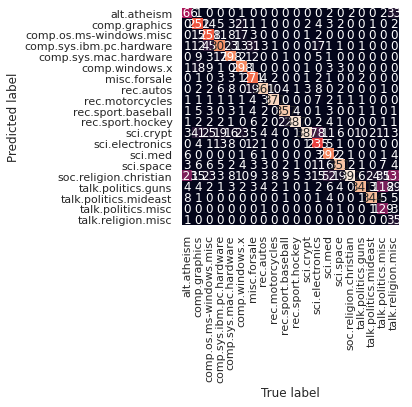

In [ ]:
# Creating confusion matrix and heat map
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)

# Plotting Heatmap of Confusion Matrix
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [ ]:
# Predicting category on new data based on trained model
def predict_category(s, train=train, model=model):
  pred = model.predict([s])
  return train.target_names[pred[0]]

**Test del modelo**

In [ ]:
for new in news:
  new["predict"] = predict_category("title: " + new["title"] + "\n" + "body: " + new["body"])

**Resultados obtenidos**

In [ ]:
for new in news:
  print("\n\n\nTitle: " + new["title"] + "\n" + "Body: " + new["body"] + "\nPredict: " + new["predict"])

print(len(news))




Title: Where Clubhouse and Twitter Spaces fall short
Body: Good luck trying to participate in live audio chats if you have hearing loss. But improvements are in the works.
Predict: soc.religion.christian



Title: COVID-19 showed digital accessibility is critical. Advocates don't want you to forget
Body: As more people get vaccinated and the world reopens, experts say remote work, virtual events and e-commerce sites should still cater to people with disabilities.
Predict: sci.crypt



Title: Apple brings sign language support to its stores, plans new accessibility features
Body: A new feature will let people who only have the use of one arm control an Apple Watch by clenching their fist or pinching their fingers.
Predict: soc.religion.christian



Title: Instagram Stories adds auto-caption sticker so you can watch without sound
Body: It's a feature accessibility advocates have long requested.
Predict: rec.autos



Title: Tech accessibility is lagging. Here's why that needs to change

**Guardar el modelo**

In [ ]:
import pickle

# Save the model
Pkl_Filename = "model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    load_model = pickle.load(file)

load_model

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
# Predicting category on load model
def predict_load_category(s, train=train, model=load_model):
  pred = load_model.predict([s])
  return train.target_names[pred[0]]

In [ ]:
# Testing the load model
predict_load_category('Car')

'rec.autos'